In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling

In [2]:
from functools import reduce

df1 = pd.read_csv('https://raw.githubusercontent.com/xander-bennett/Projects/master/San%20Diego%20Police%20Data/Data/ripa_stops_datasd.csv',sep=',')
df2 = pd.read_csv('https://raw.githubusercontent.com/xander-bennett/Projects/master/San%20Diego%20Police%20Data/Data/ripa_stop_reason_datasd.csv',sep=',')
df3 = pd.read_csv('https://raw.githubusercontent.com/xander-bennett/Projects/master/San%20Diego%20Police%20Data/Data/ripa_race_datasd.csv',sep=',')
df4 = pd.read_csv('https://raw.githubusercontent.com/xander-bennett/Projects/master/San%20Diego%20Police%20Data/Data/ripa_stop_result_datasd.csv',sep=',')
df5 = pd.read_csv('https://raw.githubusercontent.com/xander-bennett/Projects/master/San%20Diego%20Police%20Data/Data/ripa_actions_taken_datasd.csv',sep=',')

//anaconda3/envs/unit2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
//anaconda3/envs/unit2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Merge dataframes
df_merged_1 = pd.merge(df1, df2, how='inner')
df_merged_2 = pd.merge(df3, df4, how='inner')
df_merged_3= pd.merge(df_merged_1, df_merged_2, how='inner')
df = pd.merge(df_merged_3, df5, how='inner')

print(df.shape)
df.head()

(321815, 41)


,stop_id,ori,agency,exp_years,stopdate,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,...,reason_for_stop_code_text,reason_for_stop_detail,reason_for_stop_explanation,race,resultkey,result,code,resulttext,action,consented
0,2443,CA0371100,SD,10,2018-07-01,00:01:37,30,0,1,"Patrol, traffic enforcement, field operations",...,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,Officer witnessed commission of a crime,"staggering, unable to safely walk",White,6,Custodial Arrest without warrant,64005.0,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,None,NaN
1,2444,CA0371100,SD,18,2018-07-01,00:03:34,10,0,1,"Patrol, traffic enforcement, field operations",...,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,Speeding,White,2,Warning (verbal or written),54395.0,22349(B) VC - EXC 55MPH SPEED:2 LANE RD (I) 54395,None,NaN
2,2447,CA0371100,SD,1,2018-07-01,00:05:43,15,1,10,Other,...,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Matched suspect description,Both parties involved in argument.,Hispanic/Latino/a,1,No Action,NaN,NaN,Curbside detention,NaN
3,2447,CA0371100,SD,1,2018-07-01,00:05:43,15,1,10,Other,...,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Other Reasonable Suspicion of a crime,Both parties engaged in argument.,Hispanic/Latino/a,1,No Action,NaN,NaN,Curbside detention,NaN
4,2448,CA0371100,SD,3,2018-07-01,00:19:06,5,0,1,"Patrol, traffic enforcement, field operations",...,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,UNSAFE DRIVING,White,1,No Action,NaN,NaN,None,NaN


In [4]:
# df.shape

In [5]:
# df = df[df['stoptime'].str.len()<=8]

In [6]:
# df.shape

In [7]:
# df['stop_hour'] = pd.to_datetime(df['stoptime']).dt.hour
# df.stop_hour.head()

In [8]:
# pandas_profiling.ProfileReport(df)

In [9]:
cols = df.columns.tolist()
cols

['stop_id',
 'ori',
 'agency',
 'exp_years',
 'stopdate',
 'stoptime',
 'stopduration',
 'stop_in_response_to_cfs',
 'officer_assignment_key',
 'assignment',
 'intersection',
 'block',
 'land_mark',
 'street',
 'highway_exit',
 'isschool',
 'school_name',
 'cityname',
 'beat',
 'beat_name',
 'pid',
 'isstudent',
 'perceived_limited_english',
 'perceived_age',
 'perceived_gender',
 'gender_nonconforming',
 'gend',
 'gend_nc',
 'perceived_lgbt',
 'reason_for_stop',
 'reason_for_stopcode',
 'reason_for_stop_code_text',
 'reason_for_stop_detail',
 'reason_for_stop_explanation',
 'race',
 'resultkey',
 'result',
 'code',
 'resulttext',
 'action',
 'consented']

In [10]:
# dropping columns for missing values, constant values, etc.
df = df.drop(['agency', 'ori', 'block', 'gend_nc', 
         'highway_exit', 'intersection', 'land_mark',
         'school_name', 'street', 'gender_nonconforming', 
              'pid', 'consented', 'resulttext', 'code',
              'beat', 'resultkey','reason_for_stopcode', 
              'isschool', 'stop_id', 'isstudent'], axis=1)
df.shape

(321815, 21)

In [11]:
# Testing to filter for stops that gave a ticket
mask = (df['result'] == 'Citation for infraction')
print(df[mask].shape)
df[mask].head()

(46469, 21)


,exp_years,stopdate,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,cityname,beat_name,perceived_limited_english,...,perceived_gender,gend,perceived_lgbt,reason_for_stop,reason_for_stop_code_text,reason_for_stop_detail,reason_for_stop_explanation,race,result,action
25,1,2018-07-01,01:03:00,15,0,1,"Patrol, traffic enforcement, field operations",SAN DIEGO,Pacific Beach 122,0,...,Male,1,No,Traffic Violation,21453(A) VC - FAIL STOP LINE/ETC AT RED (I) 54098,Moving Violation,FAILURE TO STOP AT RED LIGHT,Middle Eastern or South Asian,Citation for infraction,None
33,2,2018-07-01,01:52:51,12,0,1,"Patrol, traffic enforcement, field operations",SAN DIEGO,La Jolla 124,0,...,Male,1,No,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,lidar @ 54 mph in a posted 35 mph zone,White,Citation for infraction,None
93,1,2018-07-01,05:00:49,20,0,1,"Patrol, traffic enforcement, field operations",SAN DIEGO,Sorrento Valley 931,0,...,Female,2,No,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Equipment Violation,Right front headlight out. Stop revealed regis...,Asian,Citation for infraction,None
95,10,2018-07-01,05:29:26,15,0,1,"Patrol, traffic enforcement, field operations",SAN DIEGO,Pacific Beach 122,0,...,Male,1,No,Reasonable Suspicion,25620 BP - POSS OPEN ALCOHOL:PUBLIC (I) 41063,Officer witnessed commission of a crime,the male was holding an open can of beer,White,Citation for infraction,Curbside detention
109,1,2018-07-01,05:42:21,83,0,1,"Patrol, traffic enforcement, field operations",SAN DIEGO,Golden Hill 517,0,...,Male,1,No,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,"Non-moving Violation, including Registration V...",SUSPENDED DRIVER'S LICENSE,White,Citation for infraction,Vehicle impounded


In [12]:
test = df[mask]
test.head()

,exp_years,stopdate,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,cityname,beat_name,perceived_limited_english,...,perceived_gender,gend,perceived_lgbt,reason_for_stop,reason_for_stop_code_text,reason_for_stop_detail,reason_for_stop_explanation,race,result,action
25,1,2018-07-01,01:03:00,15,0,1,"Patrol, traffic enforcement, field operations",SAN DIEGO,Pacific Beach 122,0,...,Male,1,No,Traffic Violation,21453(A) VC - FAIL STOP LINE/ETC AT RED (I) 54098,Moving Violation,FAILURE TO STOP AT RED LIGHT,Middle Eastern or South Asian,Citation for infraction,None
33,2,2018-07-01,01:52:51,12,0,1,"Patrol, traffic enforcement, field operations",SAN DIEGO,La Jolla 124,0,...,Male,1,No,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,lidar @ 54 mph in a posted 35 mph zone,White,Citation for infraction,None
93,1,2018-07-01,05:00:49,20,0,1,"Patrol, traffic enforcement, field operations",SAN DIEGO,Sorrento Valley 931,0,...,Female,2,No,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Equipment Violation,Right front headlight out. Stop revealed regis...,Asian,Citation for infraction,None
95,10,2018-07-01,05:29:26,15,0,1,"Patrol, traffic enforcement, field operations",SAN DIEGO,Pacific Beach 122,0,...,Male,1,No,Reasonable Suspicion,25620 BP - POSS OPEN ALCOHOL:PUBLIC (I) 41063,Officer witnessed commission of a crime,the male was holding an open can of beer,White,Citation for infraction,Curbside detention
109,1,2018-07-01,05:42:21,83,0,1,"Patrol, traffic enforcement, field operations",SAN DIEGO,Golden Hill 517,0,...,Male,1,No,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,"Non-moving Violation, including Registration V...",SUSPENDED DRIVER'S LICENSE,White,Citation for infraction,Vehicle impounded


In [13]:
# Narrowing result columns to ticket or non-ticket actions
list = ['No Action','Warning (verbal or written)', 'Citation for infraction']
test = df[df.result.isin(list)]
test.shape

(114768, 21)

In [14]:
# Confirming that only ticketed and non-ticketed stops are included
test.result.value_counts()

Citation for infraction        46469
Warning (verbal or written)    36003
No Action                      32296
Name: result, dtype: int64

In [15]:
# Applying to df
df = df[df.result.isin(list)]
df.shape

(114768, 21)

In [16]:
df.head()

,exp_years,stopdate,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,cityname,beat_name,perceived_limited_english,...,perceived_gender,gend,perceived_lgbt,reason_for_stop,reason_for_stop_code_text,reason_for_stop_detail,reason_for_stop_explanation,race,result,action
1,18,2018-07-01,00:03:34,10,0,1,"Patrol, traffic enforcement, field operations",SAN DIEGO,Mission Beach 121,0,...,Male,1,No,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,Speeding,White,Warning (verbal or written),None
2,1,2018-07-01,00:05:43,15,1,10,Other,SAN DIEGO,El Cerrito 822,0,...,Male,1,No,Reasonable Suspicion,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Matched suspect description,Both parties involved in argument.,Hispanic/Latino/a,No Action,Curbside detention
3,1,2018-07-01,00:05:43,15,1,10,Other,SAN DIEGO,El Cerrito 822,0,...,Female,2,No,Reasonable Suspicion,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Other Reasonable Suspicion of a crime,Both parties engaged in argument.,Hispanic/Latino/a,No Action,Curbside detention
4,3,2018-07-01,00:19:06,5,0,1,"Patrol, traffic enforcement, field operations",SAN DIEGO,Ocean Beach 614,0,...,Male,1,No,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,UNSAFE DRIVING,White,No Action,None
16,4,2018-07-01,00:33:19,3,0,2,Gang enforcement,SAN DIEGO,Colina Del Sol 826,0,...,Male,1,No,Traffic Violation,4000(A) VC - NO REG:VEH/TRAILER/ETC (I) 54099,"Non-moving Violation, including Registration V...",Pursuit of justice,Black/African American,No Action,None


# Feature Engineering

In [17]:
# Engineering month, year features
df.stopdate = pd.to_datetime(df.stopdate, infer_datetime_format=True)
df['month'] = df.stopdate.dt.month
df['year'] = df.stopdate.dt.year
df['day'] = df.stopdate.dt.day

df = df.drop(columns='stopdate')
df.head()

,exp_years,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,cityname,beat_name,perceived_limited_english,perceived_age,...,reason_for_stop,reason_for_stop_code_text,reason_for_stop_detail,reason_for_stop_explanation,race,result,action,month,year,day
1,18,00:03:34,10,0,1,"Patrol, traffic enforcement, field operations",SAN DIEGO,Mission Beach 121,0,25,...,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,Speeding,White,Warning (verbal or written),None,7,2018,1
2,1,00:05:43,15,1,10,Other,SAN DIEGO,El Cerrito 822,0,30,...,Reasonable Suspicion,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Matched suspect description,Both parties involved in argument.,Hispanic/Latino/a,No Action,Curbside detention,7,2018,1
3,1,00:05:43,15,1,10,Other,SAN DIEGO,El Cerrito 822,0,30,...,Reasonable Suspicion,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Other Reasonable Suspicion of a crime,Both parties engaged in argument.,Hispanic/Latino/a,No Action,Curbside detention,7,2018,1
4,3,00:19:06,5,0,1,"Patrol, traffic enforcement, field operations",SAN DIEGO,Ocean Beach 614,0,23,...,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,UNSAFE DRIVING,White,No Action,None,7,2018,1
16,4,00:33:19,3,0,2,Gang enforcement,SAN DIEGO,Colina Del Sol 826,0,30,...,Traffic Violation,4000(A) VC - NO REG:VEH/TRAILER/ETC (I) 54099,"Non-moving Violation, including Registration V...",Pursuit of justice,Black/African American,No Action,None,7,2018,1


In [18]:
# Creating ticket column
# df['ticket'] = df['result'] == 'Citation for infraction'
# df['no_ticket'] = df['result'] != 'Citation for infraction'
# df.head()

In [19]:
# Only including clean data rows from stoptime. This removes 28 rows
df = df[df['stoptime'].str.len()<=8]

In [20]:
# Now binning stoptimes by hour of the day. 0-24
df['stop_hour'] = pd.to_datetime(df['stoptime']).dt.hour
df = df.drop(columns='stoptime')
df.stop_hour.head()

1     0
2     0
3     0
4     0
16    0
Name: stop_hour, dtype: int64

In [21]:
df.stop_hour.dtype

dtype('int64')

In [22]:
# Further binning stop_hour into chunks of time. Conventionally, i think more tickets will happen at odd hours
# (Like 2 in the morning or something)
df['morning'] = (df['stop_hour'] < 12) & (df['stop_hour'] >= 6)
df['afternoon'] = (df['stop_hour'] >= 12) & (df['stop_hour'] < 19)
df['night'] = (df['stop_hour'] >= 19) & (df['stop_hour'] < 6)

df.head()

,exp_years,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,cityname,beat_name,perceived_limited_english,perceived_age,perceived_gender,...,race,result,action,month,year,day,stop_hour,morning,afternoon,night
1,18,10,0,1,"Patrol, traffic enforcement, field operations",SAN DIEGO,Mission Beach 121,0,25,Male,...,White,Warning (verbal or written),None,7,2018,1,0,False,False,False
2,1,15,1,10,Other,SAN DIEGO,El Cerrito 822,0,30,Male,...,Hispanic/Latino/a,No Action,Curbside detention,7,2018,1,0,False,False,False
3,1,15,1,10,Other,SAN DIEGO,El Cerrito 822,0,30,Female,...,Hispanic/Latino/a,No Action,Curbside detention,7,2018,1,0,False,False,False
4,3,5,0,1,"Patrol, traffic enforcement, field operations",SAN DIEGO,Ocean Beach 614,0,23,Male,...,White,No Action,None,7,2018,1,0,False,False,False
16,4,3,0,2,Gang enforcement,SAN DIEGO,Colina Del Sol 826,0,30,Male,...,Black/African American,No Action,None,7,2018,1,0,False,False,False


# Create train, val, test dataframes

In [23]:
# get features and target

target = 'result'

features = df.columns.drop('result')

In [24]:
features

Index(['exp_years', 'stopduration', 'stop_in_response_to_cfs',
       'officer_assignment_key', 'assignment', 'cityname', 'beat_name',
       'perceived_limited_english', 'perceived_age', 'perceived_gender',
       'gend', 'perceived_lgbt', 'reason_for_stop',
       'reason_for_stop_code_text', 'reason_for_stop_detail',
       'reason_for_stop_explanation', 'race', 'action', 'month', 'year', 'day',
       'stop_hour', 'morning', 'afternoon', 'night'],
      dtype='object')

In [25]:
df.shape

(114767, 26)

In [26]:
train = df
train.shape

(114767, 26)

In [27]:
from sklearn.model_selection import train_test_split

# Split train into train & test, then will split train again into train and val
train, test = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=42)
train.shape, test.shape

((91813, 26), (22954, 26))

In [28]:
# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['result'], random_state=42)
train.shape,val.shape,test.shape

((73450, 26), (18363, 26), (22954, 26))

In [29]:
# Arrange data into X features matrix and y target vector
target = 'result'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.droprop(columns=target)
y_test = test[target]
# Check shapes
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (73450, 25)
y_train shape (73450,)
X_val shape (18363, 25)
y_val shape (18363,)
X_test shape (22954, 26)
y_test shape (22954,)


In [30]:
df.isnull().sum()

exp_years                         0
stopduration                      0
stop_in_response_to_cfs           0
officer_assignment_key            0
assignment                        0
cityname                          0
beat_name                         0
perceived_limited_english         0
perceived_age                     0
perceived_gender                 40
gend                              0
perceived_lgbt                    0
reason_for_stop                   0
reason_for_stop_code_text      5502
reason_for_stop_detail         5501
reason_for_stop_explanation       1
race                              0
result                            0
action                            0
month                             0
year                              0
day                               0
stop_hour                         0
morning                           0
afternoon                         0
night                             0
dtype: int64

# Get accuracy score for majority baseline

In [31]:
# Get accuracy score for majority class baseline
y_train.value_counts(normalize=True)

Citation for infraction        0.404888
Warning (verbal or written)    0.313696
No Action                      0.281416
Name: result, dtype: float64

In [32]:
import numpy as np
from sklearn.metrics import accuracy_score

majority_class = y_train.mode()[0]
y_pred = np.full_like(y_val, fill_value=majority_class)
accuracy_score(y_val, y_pred)

0.4048902684746501

# Create Model - Random Forest

In [33]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
#     SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.7565212655884115


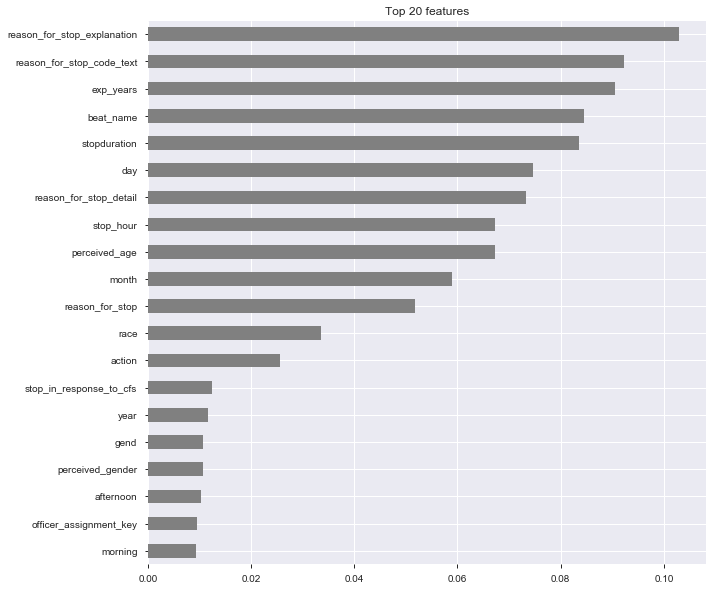

In [34]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n=20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [35]:
# Going to get permutation importance


# eli5 doesn't work well with pipelines, so need to decosntruct a little bit for it to work
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

# Going to instantiate the permuter class to get the permutation importance
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy', 
    n_iter=2, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.1018 ± 0.0025,reason_for_stop
0.0988 ± 0.0017,stopduration
0.0856 ± 0.0039,exp_years
0.0790 ± 0.0001,reason_for_stop_detail
0.0464 ± 0.0034,reason_for_stop_code_text
0.0336 ± 0.0029,reason_for_stop_explanation
0.0258 ± 0.0004,stop_hour
0.0225 ± 0.0023,beat_name
0.0175 ± 0.0002,month
0.0157 ± 0.0001,action


In [36]:
print('Shape before removing features:', X_train.shape)

Shape before removing features: (73450, 25)


In [37]:
minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]

print('Shape after removing features:', X_train.shape)

Shape after removing features: (73450, 23)


In [38]:
X_val = X_val[features]

In [39]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.7522735936393835


# Use xgboost for gradient boosting

In [40]:
# from xgboost import XGBClassifier

# gb = make_pipeline(
#     ce.OrdinalEncoder(), 
#     XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
# )

# gb.fit(X_train, y_train)

In [41]:
# from sklearn.metrics import accuracy_score
# y_pred = gb.predict(X_val)
# print('Validation Accuracy', accuracy_score(y_val, y_pred))

# PDP plots with categorical features

In [42]:
# target = 'ticket'
# features = df.columns.drop(['ticket'])

# X = df[features]
# y = df[target]


# # Use Ordinal Encoder, outside of a pipeline
# encoder = ce.OrdinalEncoder()
# X_encoded = encoder.fit_transform(X)

# model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
# model.fit(X_encoded, y)

# ROC AUC

In [43]:
%%time
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train);

CPU times: user 18.4 s, sys: 513 ms, total: 18.9 s
Wall time: 6.05 s


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['assignment', 'cityname', 'beat_name',
                                      'perceived_gender', 'reason_for_stop',
                                      'reason_for_stop_code_text',
                                      'reason_for_stop_detail',
                                      'reason_for_stop_explanation', 'race',
                                      'action'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'assignment',
                                          'data_type': dt...
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                     

In [44]:
#  get accuracy score for model
y_pred = pipeline.predict(X_val)
accuracy_score(y_val, y_pred)

0.7522735936393835

In [45]:
# define confusion matrix function
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

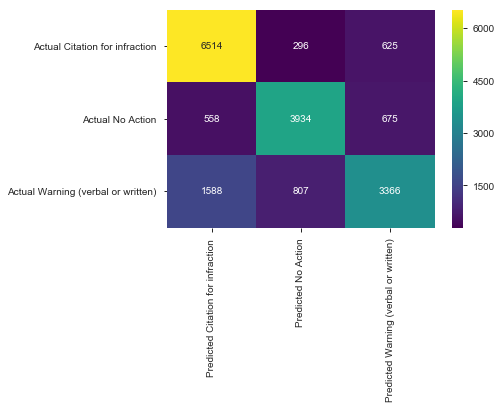

In [46]:
plot_confusion_matrix(y_val, y_pred);

In [47]:
# get precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

                             precision    recall  f1-score   support

    Citation for infraction       0.75      0.88      0.81      7435
                  No Action       0.78      0.76      0.77      5167
Warning (verbal or written)       0.72      0.58      0.65      5761

                   accuracy                           0.75     18363
                  macro avg       0.75      0.74      0.74     18363
               weighted avg       0.75      0.75      0.75     18363



In [48]:
# get ROC AUC score for model
from sklearn.metrics import roc_auc_score

y_pred_proba = pipeline.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_proba)

ValueError: multiclass format is not supported

# Exploratory Visual analysis

In [ ]:
import plotly.express as px
data = df
fig = px.scatter(data, x="stop_hour", y="stopduration", color="result",
                 size='exp_years', hover_data=['race'])
fig.show()

In [ ]:
import seaborn as sns
sns.distplot(df.exp_years);